# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

"gdown" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.
"gdown" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.
"gdown" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.


In [4]:
data = pd.read_csv('./hw_kaggle_train.csv')

In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [6]:
data

ClientPeriod  MonthlySpending TotalSpent     Sex  IsSeniorCitizen  \
0               55            19.50    1026.35    Male                0   
1               72            25.85     1872.2    Male                0   
2                1            75.90       75.9    Male                0   
3               32            79.30       2570  Female                1   
4               60           115.25    6758.45  Female                0   
...            ...              ...        ...     ...              ...   
5277             3            30.40      82.15    Male                0   
5278            50            44.45    2188.45    Male                0   
5279             1            55.05      55.05    Male                0   
5280            29            76.00    2215.25  Female                0   
5281            19            75.90     1375.6  Female                0   

     HasPartner HasChild HasPhoneService HasMultiplePhoneNumbers  \
0           Yes      Yes             Yes                      No   
1           Yes       No             Yes                     Yes   
2            No       No             Yes                      No   
3           Yes       No             Yes                     Yes   
4           Yes      Yes             Yes                     Yes   
...         ...      ...             ...                     ...   
5277         No       No              No        No phone service   
5278        Yes       No              No        No phone service   
5279         No       No             Yes                      No   
5280         No       No             Yes                     Yes   
5281         No      Yes             Yes                     Yes   

     HasInternetService HasOnlineSecurityService      HasOnlineBackup  \
0                    No      No internet service  No internet service   
1                    No      No internet service  No internet service   
2           Fiber optic                       No                   No   
3           Fiber optic                       No                   No   
4           Fiber optic                      Yes                  Yes   
...                 ...                      ...                  ...   
5277                DSL                       No                   No   
5278                DSL                      Yes                   No   
5279                DSL                       No                   No   
5280        Fiber optic                       No                   No   
5281                DSL                      Yes                  Yes   

      HasDeviceProtection HasTechSupportAccess          HasOnlineTV  \
0     No internet service  No internet service  No internet service   
1     No internet service  No internet service  No internet service   
2                      No                  Yes                   No   
3                     Yes                   No                   No   
4                     Yes                  Yes                  Yes   
...                   ...                  ...                  ...   
5277                   No                  Yes                   No   
5278                   No                  Yes                  Yes   
5279                  Yes                  Yes                   No   
5280                   No                   No                   No   
5281                   No                  Yes                  Yes   

     HasMovieSubscription HasContractPhone IsBillingPaperless  \
0     No internet service         One year                 No   
1     No internet service         Two year                 No   
2                      No   Month-to-month                Yes   
3                      No   Month-to-month                 No   
4                     Yes         Two year                 No   
...                   ...              ...                ...   
5277                   No   Month-to-month                 No   
5278                   No         One 

Я заметил, что в столбце TotalSpent есть строки-пробелы, которые логично было бы заменить нулями

In [7]:
data['TotalSpent'].replace(' ', '0', inplace=True)

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

(array([565., 562., 544., 540., 519., 519., 517., 513., 504., 499.]),
 array([   0. ,  497.7,  995.4, 1493.1, 1990.8, 2488.5, 2986.2, 3483.9,
        3981.6, 4479.3, 4977. ]),
 <BarContainer object of 10 artists>)

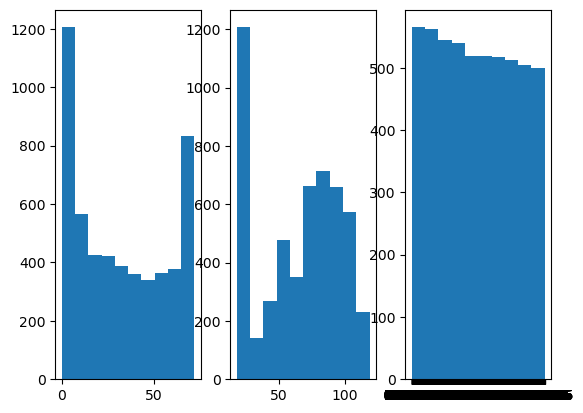

In [8]:
plt.subplot(1, 3, 1)
plt.hist(data['ClientPeriod'])
plt.subplot(1, 3, 2)
plt.hist(data['MonthlySpending'])
plt.subplot(1, 3, 3)
plt.hist(data['TotalSpent'])

Male      2655
Female    2627
Name: Sex, dtype: int64
_______________________
0    4440
1     842
Name: IsSeniorCitizen, dtype: int64
_______________________
No     2705
Yes    2577
Name: HasPartner, dtype: int64
_______________________
No     3676
Yes    1606
Name: HasChild, dtype: int64
_______________________
Yes    4761
No      521
Name: HasPhoneService, dtype: int64
_______________________
No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64
_______________________
Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64
_______________________
No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64
_______________________
No                     2332
Yes                    1809
No internet service    1141
Name: HasOnlineBackup, dtype: int64
_______________________
No                     2317
Yes        

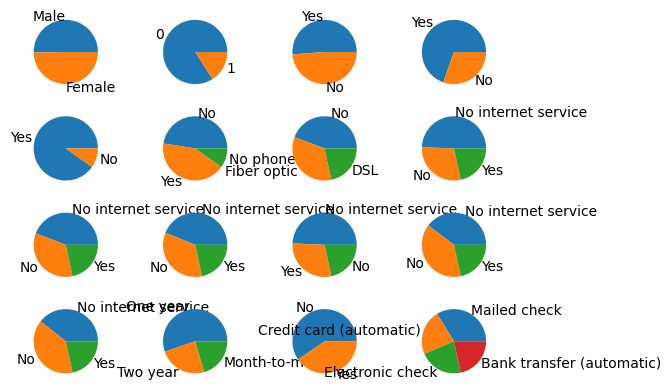

In [9]:
for i in range(16):
    print(data[cat_cols[i]].value_counts())
    plt.subplot(4, 4, i + 1)
    plt.pie(data[cat_cols[i]].value_counts(), labels=data[cat_cols[i]].unique())
    print('_______________________')

([<matplotlib.patches.Wedge at 0x1a2a7978bd0>,
 [Text(-0.7478930722742168, 0.8066324766857788, '0'),
  Text(0.7478930722742166, -0.8066324766857789, '1')])

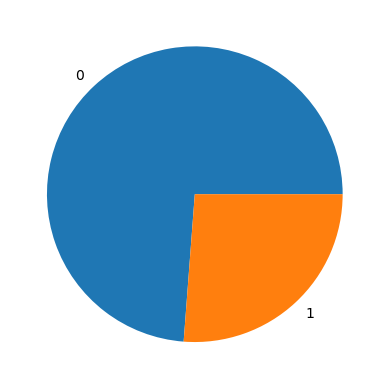

In [10]:
plt.pie(data[target_col].value_counts(), labels=data[target_col].unique())

Распределение более-менее сбалансировано, нулей всего лишь в 3 раза больше единиц

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [11]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [12]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score

In [13]:
y = data[target_col]
X = data.drop([target_col], axis=1)

ct = ColumnTransformer([
    ("onehot", OneHotEncoder(handle_unknown='ignore'), cat_cols),
], remainder='passthrough')
X = ct.fit_transform(X)

scaler = StandardScaler()
scaler.fit_transform(X)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=data[[target_col]])

In [14]:
LogReg = LogisticRegressionCV(scoring='roc_auc', refit=True, max_iter=200)
LogReg.fit(X_train, y_train)
roc_auc_score(y_valid, LogReg.predict(X_valid))

0.6938003332407665

In [15]:
LogReg.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 200,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': 'roc_auc',
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучшее качество 0.708 при C = 10

In [16]:
!pip install catboost

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [17]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor(eval_metric='AUC')
data = pd.read_csv('./hw_kaggle_train.csv')
y = data[target_col]
X = data.drop([target_col], axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=data[[target_col]])
cat.fit(X_train, y_train, cat_features=cat_cols)
roc_auc_score(y_valid, cat.predict(X_valid))

Learning rate set to 0.051411
0:	total: 184ms	remaining: 3m 4s
1:	total: 216ms	remaining: 1m 47s
2:	total: 247ms	remaining: 1m 21s
3:	total: 272ms	remaining: 1m 7s
4:	total: 296ms	remaining: 59s
5:	total: 313ms	remaining: 51.8s
6:	total: 341ms	remaining: 48.4s
7:	total: 366ms	remaining: 45.3s
8:	total: 393ms	remaining: 43.3s
9:	total: 414ms	remaining: 41s
10:	total: 442ms	remaining: 39.7s
11:	total: 462ms	remaining: 38.1s
12:	total: 489ms	remaining: 37.1s
13:	total: 514ms	remaining: 36.2s
14:	total: 537ms	remaining: 35.3s
15:	total: 565ms	remaining: 34.7s
16:	total: 588ms	remaining: 34s
17:	total: 611ms	remaining: 33.4s
18:	total: 635ms	remaining: 32.8s
19:	total: 660ms	remaining: 32.3s
20:	total: 685ms	remaining: 31.9s
21:	total: 708ms	remaining: 31.5s
22:	total: 731ms	remaining: 31.1s
23:	total: 754ms	remaining: 30.7s
24:	total: 769ms	remaining: 30s
25:	total: 791ms	remaining: 29.6s
26:	total: 817ms	remaining: 29.4s
27:	total: 842ms	remaining: 29.2s
28:	total: 866ms	remaining: 29s
29

0.8386050171248727

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

Лучшее качество 0.825 при параметрах по умолчанию

# Предсказания

In [18]:
best_model = cat

In [19]:
X_test = pd.read_csv('./hw_kaggle_test.csv')
submission = pd.read_csv('./hw_kaggle_submission.csv')

submission['Churn'] = pd.DataFrame(best_model.predict(X_test))
submission.to_csv('./hw_kaggle_submission.csv')

Лучшее решение отправьте в Stepik.